In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve

from sklearn.dummy import DummyClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the dataset and viewing the first few rows
df = pd.read_csv('cleaned_titanic_df.txt')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,...,title,male,cabin_deck,Embarked_s,Embarked_q,Embarked_c,family_size,is_alone,is_child,is_senior
0,0,1,0,3,male,22.0,1,0,7.2500,NaN,...,Mr,1,6,1,0,0,2,0,0,0
1,1,2,1,1,female,38.0,1,0,71.2833,C85,...,Mrs,0,3,0,0,1,2,0,0,0
2,2,3,1,3,female,26.0,0,0,7.9250,NaN,...,Miss,0,6,1,0,0,1,1,0,0
3,3,4,1,1,female,35.0,1,0,53.1000,C123,...,Mrs,0,3,1,0,0,2,0,0,0
4,4,5,0,3,male,35.0,0,0,8.0500,NaN,...,Mr,1,6,1,0,0,1,1,0,0


In [3]:
# Dropping unwanted columns
df.drop(columns=['Unnamed: 0', 'PassengerId', 'Pclass', 'Sex', 'Cabin', 'Embarked'], inplace=True)

# Checking KNN assumptions

In [4]:
# Checking the counts for the outcome variable
df.Survived.value_counts()

Survived
0    543
1    328
Name: count, dtype: int64

In [5]:
# Checking the positivity rate for the outcome variable
positivity_rate = 328/len(df)
print(positivity_rate)
# We can see that the positivity rate is not balanced, so this will be addressed with oversampling

0.37657864523536166


In [6]:
# Checking how many rows of data and features
df.shape
# More than enough samples for features, using the rule of 10 samples per feature

(871, 18)

In [7]:
# Creating a dummy df to turn categorical columns into numeric
dummy_df = pd.get_dummies(df, columns=['title'], drop_first=False, dtype='int64')

In [8]:
# Creating two new variable, one for the features and one for the outcome 
x = dummy_df.drop(columns=['Survived'])
y = dummy_df[['Survived']]

# Best Train Test Split

In [9]:
# Function to train and evaluate a logistic regression model
def best_random_state(state):
    
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=state)   
    
    # Applying SMOTE to balance the training set
    sm = SMOTE(random_state=1, sampling_strategy= 'minority')
    x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
    
    # Scaling the training and testing sets
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train_res)
    x_test_scaled = scaler.transform(x_test)
    
    # Initialize and train the logistic regression model
    model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    model.fit(x_train_scaled, y_train_res)
    
    # Evaluate the model and return the accuracy
    accuracy = model.score(x_test_scaled, y_test)
    return accuracy

In [10]:
# Creating an empty list to hold all the accuracies from different random states
acc = []

# Performing the function for 100 different random states and adding the accuracies to the list
for k in range(1,101):
    acc.append(best_random_state(k))

In [11]:
# Creating a list of the random state potential numbers
random_state_list = range(1,101)

# Finding the index of the max value in the list
best_split_index = acc.index(max(acc))

# Using the index to find the best train test split
best_split = random_state_list[best_split_index]
best_split

21

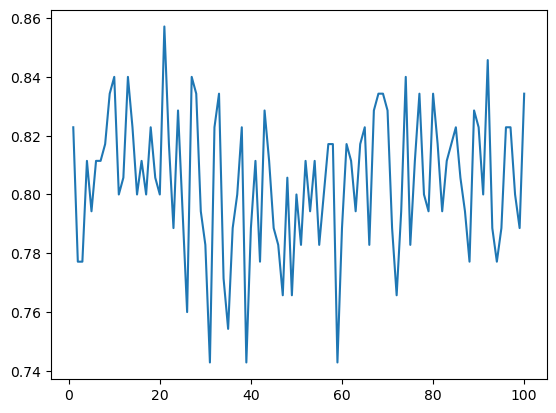

In [12]:
# Visualising the test scores associated with each random state value
plt.plot(random_state_list, acc)
plt.show()

# Best Random State SMOTE

In [13]:
# Function to train and evaluate a logistic regression model
def best_smote_random_state(state):
    
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=best_split)   
    
    # Applying SMOTE to balance the training set
    sm = SMOTE(random_state=state, sampling_strategy= 'minority')
    x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
    
    # Scaling the training and testing sets
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train_res)
    x_test_scaled = scaler.transform(x_test)
    
    # Initialize and train the logistic regression model
    model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    model.fit(x_train_scaled, y_train_res)
    
    # Evaluate the model and return the accuracy
    accuracy = model.score(x_test_scaled, y_test)
    return accuracy

In [14]:
# Creating an empty list to hold all the accuracies from different random states
smote_acc = []

# Performing the function for 100 different random states and adding the accuracies to the list
for k in range(1,101):
    smote_acc.append(best_smote_random_state(k))

In [15]:
# Finding the index of the max value in the list
best_smote_split_index = smote_acc.index(max(smote_acc))

# Using the index to find the best train test split
best_smote_split = random_state_list[best_smote_split_index]
best_smote_split

1

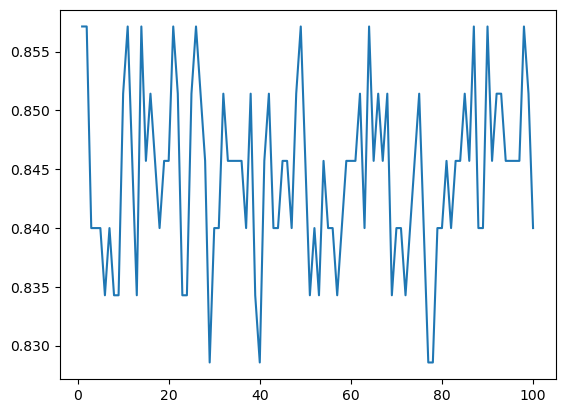

In [16]:
# Visualising the test scores associated with each random state value
plt.plot(random_state_list, smote_acc)
plt.show()

# Train Test Split

In [17]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=best_split)

# SMOTE

In [18]:
# checking the value counts for the outcome variable in the training data
print(y_train.value_counts())

Survived
0           437
1           259
Name: count, dtype: int64


In [19]:
# Balancing out the outcome variable 'survived' in the training data using SMOTE
sm = SMOTE(random_state=best_smote_split, sampling_strategy='minority')

# Applying the smote sampler to the training data
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Checking the value counts for the outcome variable in the training data
print(y_train_res.value_counts())

Survived
0           437
1           437
Name: count, dtype: int64


# Scaling 

In [20]:
# Creating a standard scaler
scaler = StandardScaler()

# Fitting and transforming the x_train data
x_train_scaled = scaler.fit_transform(x_train_res)

# Using the scaler to transform the test data
x_test_scaled = scaler.transform(x_test)

# KNN Classifier

In [21]:
# Creating a knn classifier
classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fitting the classifier to the training data
classifier.fit(x_train_scaled, y_train_res)

KNeighborsClassifier(n_jobs=-1)

In [22]:
# Getting the accuracy score on the training and test data
print('Train score')
print(classifier.score(x_train_scaled, y_train_res))
print('Test score')
print(classifier.score(x_test_scaled, y_test))

Train score
0.8821510297482837
Test score
0.8571428571428571


In [23]:
# Getting the prediction on the training and test data
y_pred_train = classifier.predict(x_train_scaled)
y_pred_test = classifier.predict(x_test_scaled)

In [24]:
# Getting the accuracy score of the model on the testing data
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy score is ' + str(accuracy))

# Getting the precision score of the model on the testing data
precision = precision_score(y_test, y_pred_test)
print('Precision score is ' + str(precision))

# Getting the recall score of the model on the testing data
recall = recall_score(y_test, y_pred_test)
print('Recall score is ' + str(recall))

# Getting the f1 score of the model on the testing data
f1 = f1_score(y_test, y_pred_test)
print('F1 score is ' + str(f1))

Accuracy score is 0.8571428571428571
Precision score is 0.8333333333333334
Recall score is 0.7971014492753623
F1 score is 0.8148148148148148


In [25]:
# Getting the train and test mse
train_mse = mean_squared_error(y_train_res, y_pred_train)
print('Train MSE '+ str(train_mse))
test_mse = mean_squared_error(y_test, y_pred_test)
print('Test MSE ' + str(test_mse))

Train MSE 0.11784897025171624
Test MSE 0.14285714285714285


In [26]:
# Creating a confusion matrix to show the TN, FP, FN , TP
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test), index=['Died', 'Survived'], 
                                     columns=['Predicted Dead', 'Predicted Survived'])
test_confusion_matrix

,Predicted Dead,Predicted Survived
Died,95,11
Survived,14,55


# Feature Selection

In [27]:
# Using sequential forward floating fetaure selection, to see if we can reduce the number of features
sffs = SFS(classifier, k_features=23, forward=True, floating=True, scoring='accuracy', cv=5, n_jobs=-1)
# Fitting the the sffs to the training data
sffs = sffs.fit(x_train_scaled, y_train_res)

In [28]:
# Seeing the cv score using all 23 features
print(sffs.subsets_[23]['avg_score'])

0.8135238095238094


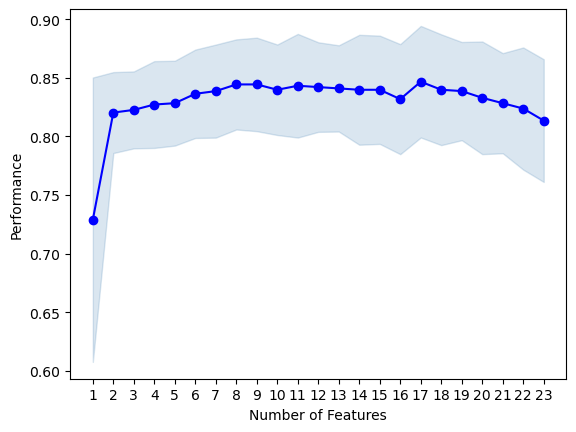

In [29]:
# Plotting the accuracy of the model as the number of features changes
plot_sfs(sffs.get_metric_dict())
plt.show()

In [30]:
# Using sequential forward floating feature selection to reduce the features down to the best 8
sffs_2 = SFS(classifier, k_features=8, forward=True, floating=True, scoring='accuracy', cv=5, n_jobs=-1)
# Fitting the the sffs to the training data
sffs_2 = sffs_2.fit(x_train_scaled, y_train_res)

In [31]:
# Seeing the features that were selected
selected_features = sffs_2.k_feature_idx_
selected_feature_names = [x.columns[i] for i in selected_features]

print(sffs_2.k_feature_idx_)
print(selected_feature_names)
print(sffs_2.subsets_[8]['avg_score'])

(3, 6, 7, 12, 16, 17, 18, 20)
['Fare', 'Pclass_3', 'male', 'family_size', 'title_Capt', 'title_Dr', 'title_Master', 'title_Mr']
0.8387060755336616


In [32]:
# Transforming the x train_res and x test data to just include the features selected
x_train_trans = sffs_2.transform(x_train_res)
x_test_trans = sffs_2.transform(x_test)

# Scaling

In [33]:
# Creating a new standard scaler model
scaler_2 = StandardScaler()

# Fitting the scaler and transforming the training data
x_train_scaled_2 = scaler_2.fit_transform(x_train_trans)

# Transforming the testing data
x_test_scaled_2 = scaler_2.transform(x_test_trans)

# KNN Classifier #2

In [34]:
# Creating a new classifier 
classifier_2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Fitting the classifier with the new subset of training features
classifier_2.fit(x_train_scaled_2, y_train_res)

KNeighborsClassifier(n_jobs=-1)

In [35]:
# Calculating the score on the train and test data
print('Train score')
print(classifier_2.score(x_train_scaled_2, y_train_res))
print('Test score')
print(classifier_2.score(x_test_scaled_2, y_test))

Train score
0.8695652173913043
Test score
0.84


In [36]:
# Getting the prediction on the training and test data
y_pred_train_2 = classifier_2.predict(x_train_scaled_2)
y_pred_test_2 = classifier_2.predict(x_test_scaled_2)

In [37]:
# Getting the accuracy score of the model on the testing data
accuracy_2 = accuracy_score(y_test, y_pred_test_2)
print('Accuracy score is ' + str(accuracy_2))

# Getting the precision score of the model on the testing data
precision_2 = precision_score(y_test, y_pred_test_2)
print('Precision score is ' + str(precision_2))

# Getting the recall score of the model on the testing data
recall_2 = recall_score(y_test, y_pred_test_2)
print('Recall score is ' + str(recall_2))

# Getting the f1 score of the model on the testing data
f1_2 = f1_score(y_test, y_pred_test_2)
print('F1 score is ' + str(f1_2))

Accuracy score is 0.84
Precision score is 0.8253968253968254
Recall score is 0.7536231884057971
F1 score is 0.7878787878787878


In [38]:
# Getting the train and test mse
train_mse_2 = mean_squared_error(y_train_res, y_pred_train_2)
print('Train MSE '+ str(train_mse_2))
test_mse_2 = mean_squared_error(y_test, y_pred_test_2)
print('Test MSE ' + str(test_mse_2))

Train MSE 0.13043478260869565
Test MSE 0.16


In [39]:
# Creating a confusion matrix to show the TN, FP, FN , TP
test_confusion_matrix_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_2), index=['Died', 'Survived'], 
                                     columns=['Predicted Dead', 'Predicted Survived'])
test_confusion_matrix_2

,Predicted Dead,Predicted Survived
Died,95,11
Survived,17,52


# Hyperparameter tuning

In [40]:
# Finding the best value for k
accuracies = []
for k in range(1,101):
    test_classifier = KNeighborsClassifier(n_neighbors=k)
    test_classifier.fit(x_train_scaled_2, y_train_res)
    accuracies.append(test_classifier.score(x_test_scaled_2, y_test))

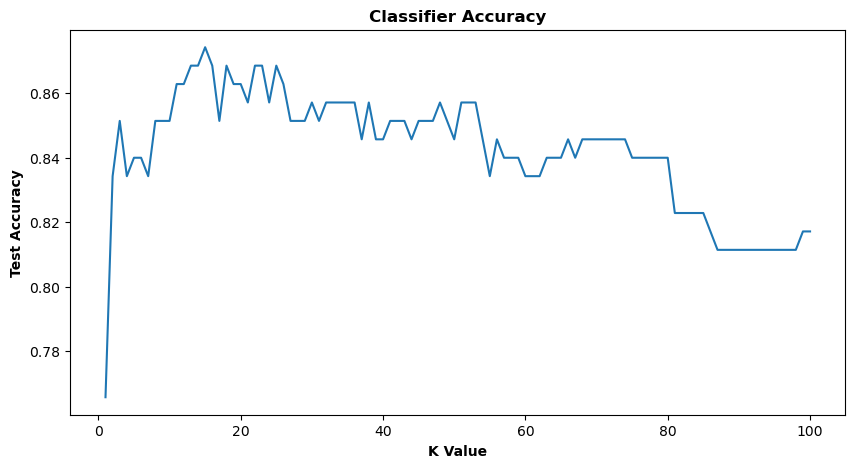

In [41]:
# Visualising the best value for k
k_list = range(1, 101)

plt.figure(figsize=(10,5))
plt.plot(k_list, accuracies)
plt.title('Classifier Accuracy', weight='bold')
plt.xlabel('K Value', weight='bold')
plt.ylabel('Test Accuracy', weight='bold')
plt.show()

In [42]:
# Finding the index of the max value in the accuracies list
best_k_index = accuracies.index(max(accuracies))

# Using the index to find the best k value
best_k_value = k_list[best_k_index]
best_k_value

15

# Tuned KNN Classifier

In [43]:
# Creating a final model with the subset of features and best k value
final_classifier = KNeighborsClassifier(n_neighbors=best_k_value, n_jobs=-1)

# Fitting the model with the subset of features
final_classifier.fit(x_train_scaled_2, y_train_res)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

# Evaluating Tuned Model

In [44]:
# Calculating the score for the train and test data
print('Train score')
print(final_classifier.score(x_train_scaled_2, y_train_res))
print('Test score')
print(final_classifier.score(x_test_scaled_2, y_test))

Train score
0.8409610983981693
Test score
0.8742857142857143


In [45]:
# Getting the prediction on the training and test data
y_pred_train_3 = final_classifier.predict(x_train_scaled_2)
y_pred_test_3 = final_classifier.predict(x_test_scaled_2)

In [46]:
# Getting the accuracy score of the model on the testing data
accuracy_3 = accuracy_score(y_test, y_pred_test_3)
print('Accuracy score is ' + str(accuracy_3))

# Getting the precision score of the model on the testing data
precision_3 = precision_score(y_test, y_pred_test_3)
print('Precision score is ' + str(precision_3))

# Getting the recall score of the model on the testing data
recall_3 = recall_score(y_test, y_pred_test_3)
print('Recall score is ' + str(recall_3))

# Getting the f1 score of the model on the testing data
f1_3 = f1_score(y_test, y_pred_test_3)
print('F1 score is ' + str(f1_3))

Accuracy score is 0.8742857142857143
Precision score is 0.8615384615384616
Recall score is 0.8115942028985508
F1 score is 0.835820895522388


In [47]:
# Getting the train and test mse
train_mse_3 = mean_squared_error(y_train_res, y_pred_train_3)
print('Train MSE '+ str(train_mse_3))
test_mse_3 = mean_squared_error(y_test, y_pred_test_3)
print('Test MSE ' + str(test_mse_3))

Train MSE 0.15903890160183065
Test MSE 0.12571428571428572


In [48]:
# Creating a confusion matrix to show the TN, FP, FN , TP
test_confusion_matrix_3 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_3), index=['Died', 'Survived'], 
                                     columns=['Predicted Dead', 'Predicted Survived'])
test_confusion_matrix_3

,Predicted Dead,Predicted Survived
Died,97,9
Survived,13,56


# ROC Score And Thresholds

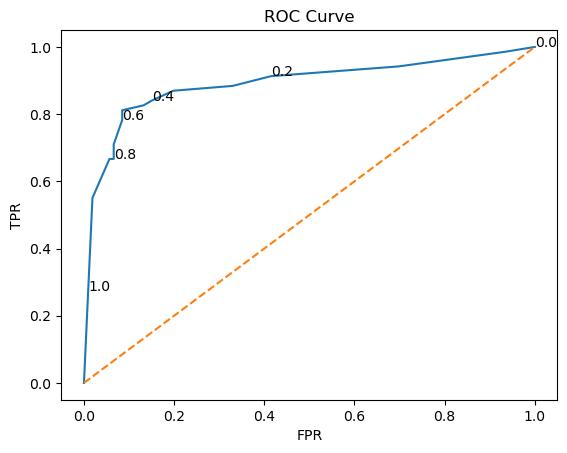

In [49]:
# Getting the probabilities of each outcome for the test set from the simpler model
y_pred_prob_test = final_classifier.predict_proba(x_test_scaled_2)

# Getting the true positive rate and false postive rate from the testing set
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_test[:,1])

# Visualing the fpr and tpr 
plt.plot(fpr, tpr)
idx = list(range(len(threshold)))[1::3]
for i in idx:
    plt.text(fpr[i], tpr[i], threshold[i].round(2))
    
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train_scaled_2, y_train_res)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test_scaled_2)[:,1])

clf_fpr, clf_tpr, clf_threshold = roc_curve(y_test, clf.predict_proba(x_test_scaled_2)[:,1])
plt.plot(clf_fpr, clf_tpr, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('knn_roc_curve.png')
plt.show()

In [50]:
# Finding the roc auc score
roc_auc_score_ = roc_auc_score(y_test, y_pred_prob_test[:,1])
roc_auc_score_

0.8906890894175554

In [51]:
# Finding the best threshold youlden stat, highest tpr
j_scores = tpr - fpr

# Youlden's J statistic
youlden_threshold = threshold[np.argmax(j_scores)]
print(youlden_threshold)

0.5333333333333333


In [52]:
# Creating a confusion matrix for youlden threshold
y_pred_youlden = (y_pred_prob_test[:,1] > youlden_threshold)*1.0
cm_youlden = confusion_matrix(y_test, y_pred_youlden)
print(cm_youlden)

[[97  9]
 [15 54]]


In [53]:
# Getting the accuracy score for the model at the best threshold
accuracy_youlden = accuracy_score(y_test, y_pred_youlden)
print('Accuracy score is ' + str(accuracy_youlden))

Accuracy score is 0.8628571428571429


# Learning Curve

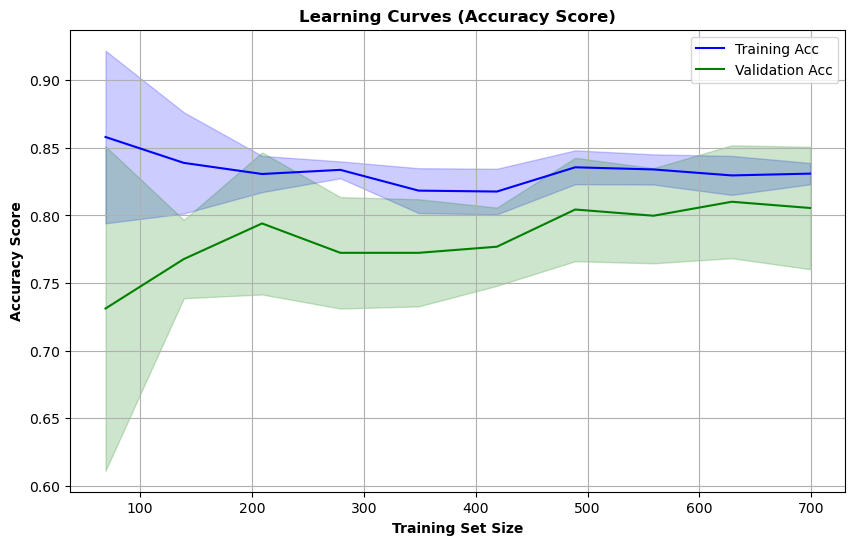

In [54]:
# Getting the learning curve data for the training and validation sets
train_sizes, train_scores, val_scores = learning_curve(final_classifier, x_train_scaled_2, y_train_res, 
                                                       cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), 
                                                       random_state=1)

# Calculate the mean and std for the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Visualising the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Acc', color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Acc', color='green')

# Filling below and above the mean by 1 std for the training and validation sets
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color='green', alpha=0.2)

plt.title('Learning Curves (Accuracy Score)', weight='bold')
plt.xlabel('Training Set Size', weight='bold')
plt.ylabel('Accuracy Score', weight='bold')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('knn_learning_curve.png')
plt.show()

# Making Predictions

In [55]:
# Entering in values for each feature

# 'Fare', 'Pclass_3', 'male', 'family_size', 'title_Capt', 'title_Dr', 'title_Master', 'title_Mr'

person_1 = np.array([30.0, 1, 1, 2, 0, 0, 0, 1])
person_2 = np.array([50.0, 0, 0, 1, 0, 0, 0, 0])
person_3 = np.array([80.0, 0, 1, 0, 0, 1, 0, 0])
person_4 = np.array([120.0, 0, 0, 2, 0, 0, 0, 0])

# Adding all the predictions into the same variable
titanic_pred = np.stack((person_1, person_2, person_3, person_4))

In [56]:
# Using the standard scaler to get the predictions in the same scale
titanic_pred = scaler_2.transform(titanic_pred)

In [57]:
# Using the model to get the predictions
print(final_classifier.predict(titanic_pred))

# Using the model to get the probabilities of each outcome
print(final_classifier.predict_proba(titanic_pred))

[0 1 1 1]
[[1.         0.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]]
